## Rodrigo Xavier
## Matrícula 569037

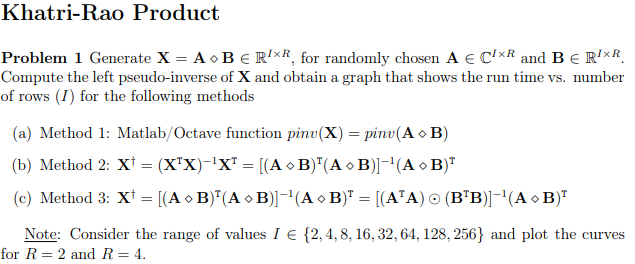

In [3]:
import tensorly as tl
import numpy as np
import time
from tensorly.tenalg import khatri_rao
from scipy.linalg import pinv

def method1(A,B):
    """Calculates the left pseudo-inverse using pinv and tensorly khatri-rao function."""
    X = khatri_rao([A,B])
    X_pinv = np.linalg.pinv(X)
    return X_pinv

def method2(A,B):
    """
    Performs the following matrix operation:
    X† = [khatri_rao(A, B).T @ khatri_rao(A, B)]^-1 @ khatri_rao(A, B).T

    Parameters:
        A (numpy.ndarray): Matrix A of shape (m, r)
        B (numpy.ndarray): Matrix B of shape (n, r)

    Returns:
        numpy.ndarray: Resulting matrix X† of shape (r, m*n)
    """
    # Step 1: Compute the Khatri-Rao product
    KR = khatri_rao([A,B])  # Shape: (m*n, r)

    # Step 2: Compute [KR.T @ KR]^-1
    KR_T_KR = KR.T @ KR  # Shape: (r, r)
    KR_T_KR_inv = np.linalg.inv(KR_T_KR)  # Inverse of the product

    # Step 3: Compute X†
    X_pinv = KR_T_KR_inv @ KR.T  # Shape: (r, m*n)

    return X_pinv

def method3(A, B):
    """
    Performs the following matrix operation:
    X† = [Hadamard_product((A.T @ A), (B.T @ B))]^-1 @ khatri_rao(A, B).T

    Parameters:
        A (numpy.ndarray): Matrix A of shape (m, r)
        B (numpy.ndarray): Matrix B of shape (n, r)

    Returns:
        numpy.ndarray: Resulting matrix X† of shape (r, m*n)
    """
    # Step 1: Compute (A.T @ A) and (B.T @ B)
    ATA = A.T @ A  # Shape: (r, r)
    BTB = B.T @ B  # Shape: (r, r)

    # Step 2: Compute the Hadamard product of (A.T @ A) and (B.T @ B)
    HAD = np.multiply(ATA, BTB)  # Shape: (r, r)

    # Step 3: Inverse of the Hadamard product
    HAD_inv = np.linalg.inv(HAD)  # Shape: (r, r)

    # Step 4: Compute the Khatri-Rao product of A and B
    KR = khatri_rao([A, B])  # Shape: (m*n, r)

    # Step 5: Final multiplication
    X_pinv = HAD_inv @ KR.T  # Shape: (r, m*n)

    return X_pinv

# Function to measure runtime
def measure_runtime(method, A, B):
    start_time = time.time()
    method(A, B)
    return (time.time() - start_time) * 1000  # Convert to milliseconds

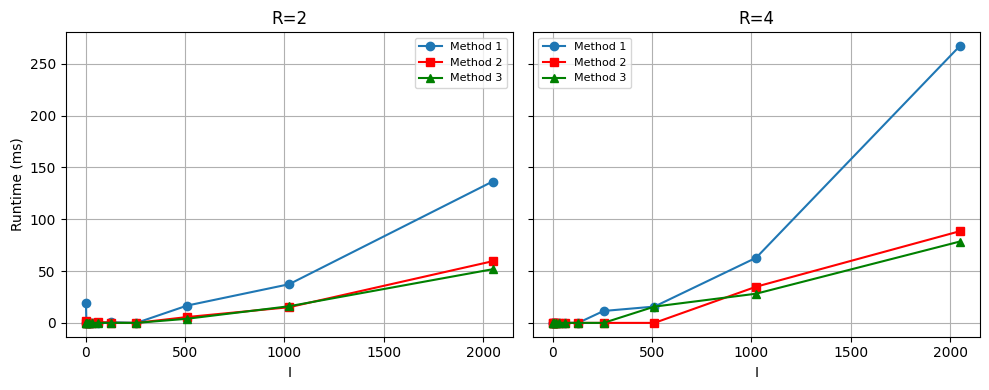

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Setup
I_values = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
R_values = [2, 4]
results = []

# Running for different I and R
for R in R_values:
    for I in I_values:
        # Generate random matrices A and B
        A = np.random.randn(I, R)
        B = np.random.randn(I, R)
        
        # Measure runtimes
        runtime_method1 = measure_runtime(method1, A, B)
        runtime_method2 = measure_runtime(method2, A, B)
        runtime_method3 = measure_runtime(method3, A, B)
        
        # Append results
        results.append({
            "R": R,
            "I": I,
            "Method1_Time": runtime_method1,
            "Method2_Time": runtime_method2,
            "Method3_Time": runtime_method3
        })

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Filter data for R=2 and R=4
df_r2 = df[df["R"] == 2]
df_r4 = df[df["R"] == 4]

# Plot for R=2
axes[0].plot(df_r2["I"], df_r2["Method1_Time"], label="Method 1", marker='o')
axes[0].plot(df_r2["I"], df_r2["Method2_Time"], label="Method 2", marker='s', color='red')
axes[0].plot(df_r2["I"], df_r2["Method3_Time"], label="Method 3", marker='^', color='green')
axes[0].set_title("R=2")
axes[0].set_xlabel("I")
axes[0].set_ylabel("Runtime (ms)")
axes[0].legend(fontsize=8)
axes[0].grid(True)

# Plot for R=4
axes[1].plot(df_r4["I"], df_r4["Method1_Time"], label="Method 1", marker='o')
axes[1].plot(df_r4["I"], df_r4["Method2_Time"], label="Method 2", marker='s', color='red')
axes[1].plot(df_r4["I"], df_r4["Method3_Time"], label="Method 3", marker='^', color='green')
axes[1].set_title("R=4")
axes[1].set_xlabel("I")
axes[1].legend(fontsize=8)
axes[1].grid(True)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

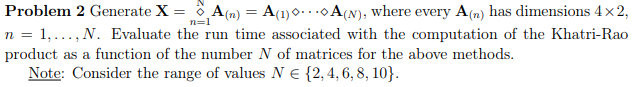

In [5]:
def method1(matrices):
    """Calculates the left pseudo-inverse using pinv and tensorly khatri-rao function."""
    X = khatri_rao(matrices)
    X_pinv = np.linalg.pinv(X)
    return X_pinv

def method2(matrices):
    """
    Performs the following matrix operation:
    X† = [khatri_rao(A, B).T @ khatri_rao(A, B)]^-1 @ khatri_rao(A, B).T

    Parameters:
        A (numpy.ndarray): Matrix A of shape (m, r)
        B (numpy.ndarray): Matrix B of shape (n, r)

    Returns:
        numpy.ndarray: Resulting matrix X† of shape (r, m*n)
    """
    # Step 1: Compute the Khatri-Rao product
    KR = khatri_rao(matrices)  # Shape: (m*n, r)

    # Step 2: Compute [KR.T @ KR]^-1
    KR_T_KR = KR.T @ KR  # Shape: (r, r)
    KR_T_KR_inv = np.linalg.inv(KR_T_KR)  # Inverse of the product

    # Step 3: Compute X†
    X_pinv = KR_T_KR_inv @ KR.T  # Shape: (r, m*n)

    return X_pinv

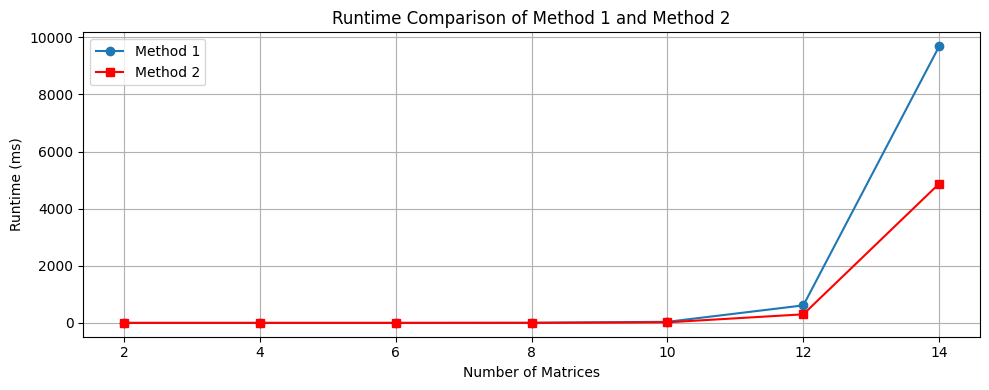

In [8]:
# Runtime measurement
def measure_runtime(num_matrices_list, matrix_shape):
    method1_times = []
    method2_times = []

    for n in num_matrices_list:
        # Generate random matrices of shape (4, 2)
        matrices = [np.random.randn(*matrix_shape) for _ in range(n)]

        # Measure runtime for method1
        start = time.perf_counter()
        method1(matrices)
        end = time.perf_counter()
        method1_times.append((end - start) * 1000)  # Convert to ms

        # Measure runtime for method2
        start = time.perf_counter()
        method2(matrices)
        end = time.perf_counter()
        method2_times.append((end - start) * 1000)  # Convert to ms

    return method1_times, method2_times

# Parameters
num_matrices_list = [2, 4, 6, 8, 10, 12, 14]  # Varying number of matrices
matrix_shape = (4, 2)  # Each matrix has shape 4x2

# Measure runtimes
method1_times, method2_times = measure_runtime(num_matrices_list, matrix_shape)

# Plot the results
plt.figure(figsize=(10, 4))

# Plot runtimes
plt.plot(num_matrices_list, method1_times, marker='o', label='Method 1')
plt.plot(num_matrices_list, method2_times, marker='s', label='Method 2', color='red')

plt.xlabel('Number of Matrices')
plt.ylabel('Runtime (ms)')
plt.title('Runtime Comparison of Method 1 and Method 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()